In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

In [2]:
df = pd.read_spss("data/caspian1 data.sav")

In [3]:
df.head()

,id,code,sex,univer,state,province,district,schoolty,grade,birthdat,...,waist,hip,bmi,fbs_rec,tc_r,tg_rec,tc_rec,ldl_re,hdl_rec,bmi_rec
0,458.0,10444.0,NaN,Rasht,10.0,1.0,Urban,Public School,Primary,1375.0,...,53.0,63.0,13.376932,Normoglycemic,Acceptable,Normal,Normal,Low Borderline,Abnormal,Normal
1,476.0,10471.0,Male,Arak,1.0,1.0,Rural,Public School,Primary,1377.0,...,51.0,60.0,14.609204,NaN,NaN,NaN,NaN,NaN,NaN,Normal
2,43.0,20037.0,Male,Ahvaz,2.0,1.0,Urban,Public School,Primary,1377.0,...,58.0,68.0,18.256319,NaN,NaN,NaN,NaN,NaN,NaN,Normal
3,711.0,80705.0,Male,Tabriz,8.0,1.0,Rural,Public School,Primary,1377.0,...,60.0,65.0,20.361814,Normoglycemic,Acceptable,Normal,Normal,Low Borderline,Normal,Obese
4,415.0,90408.0,Male,Khoram_Abad,9.0,1.0,Urban,Public School,Primary,1377.0,...,67.0,80.0,17.313019,NaN,NaN,NaN,NaN,NaN,NaN,Normal


In [4]:
df_selected = df[['sex','age','height','weight','hip','waist']]
df_selected.shape

(21108, 6)

In [5]:
df_selected = df_selected[(df_selected['age']>=7) & (df_selected['age']<=18)]
df_selected.dropna(inplace=True)


In [6]:
df_selected.shape

(19912, 6)

In [7]:
age_stats = df_selected.groupby(['age', 'sex']).agg({'height': ['mean', 'std']}).reset_index()

# Flatten multi-level column names
age_stats.columns = ['age', 'sex', 'Mean_Height', 'Std_Height']




/tmp/ipykernel_22203/2284735969.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = df_selected.groupby(['age', 'sex']).agg({'height': ['mean', 'std']}).reset_index()


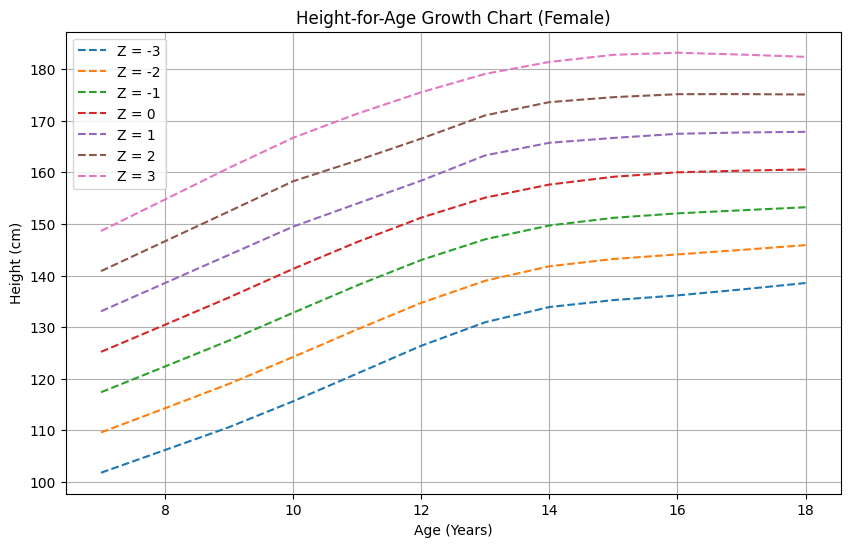

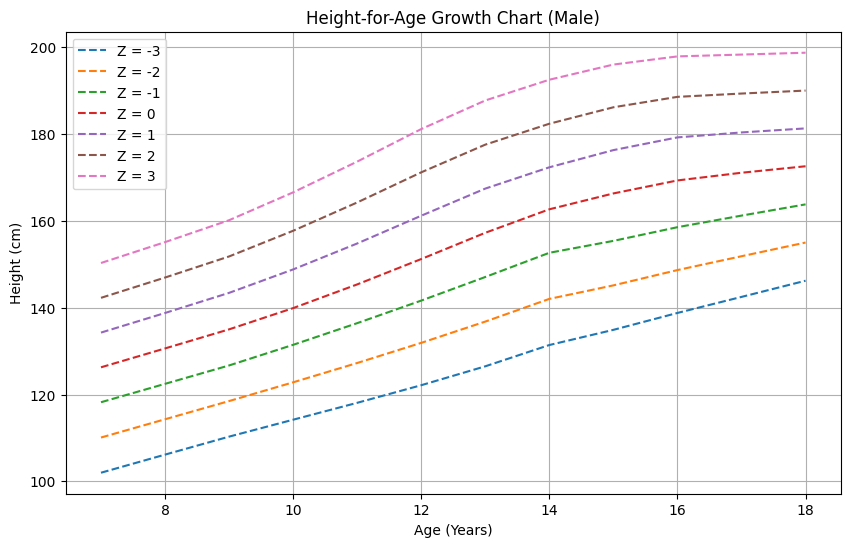

In [10]:
z_scores = range(-3, 4)

# Loop through sexes to plot separately
for sex in age_stats['sex'].unique():
    sex_data = age_stats[age_stats['sex'] == sex]
    ages = sex_data['age']
    
    plt.figure(figsize=(10, 6))
    for z in z_scores:
        # Calculate z-score-adjusted heights
        z_line = sex_data['Mean_Height'] + z * sex_data['Std_Height']
        
        # Apply LOESS smoothing
        loess_smoothed = lowess(z_line, ages, frac=0.5)  # Adjust frac for smoothness
        smoothed_ages = loess_smoothed[:, 0]
        smoothed_heights = loess_smoothed[:, 1]
        
        # Plot smoothed Z-score lines
        plt.plot(smoothed_ages, smoothed_heights, label=f'Z = {z}', linestyle='--')

    # Customize the plot
    plt.title(f'Height-for-Age Growth Chart ({sex})')
    plt.xlabel('Age (Years)')
    plt.ylabel('Height (cm)')
    plt.legend()
    plt.grid(True)
    plt.show()

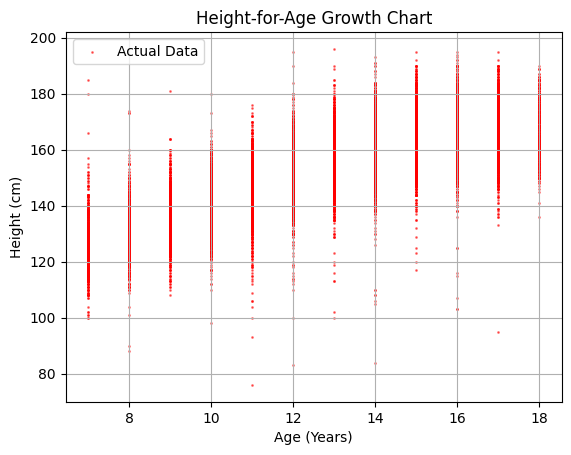

In [9]:
plt.scatter(df_selected['age'], df_selected['height'], color='red', s=1, alpha=0.5, label='Actual Data')

# Step 4: Customize the plot
plt.title('Height-for-Age Growth Chart')
plt.xlabel('Age (Years)')
plt.ylabel('Height (cm)')
plt.legend()
plt.grid(True)
plt.show()